In [229]:
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import time

In [23]:
ia_shp = gpd.read_file('../../Downloads/county/county.shp')

In [216]:
print(ia_shp["COUNTY"][45:90])

45           Benton
46             Tama
47           Monona
48         Crawford
49          Carroll
50           Greene
51            Boone
52            Story
53         Marshall
54          Clinton
55            Cedar
56         Harrison
57           Shelby
58          Audubon
59          Guthrie
60          Johnson
61           Dallas
62             Iowa
63             Polk
64        Poweshiek
65           Jasper
66            Scott
67        Muscatine
68    Pottawattamie
69             Cass
70       Washington
71            Adair
72           Keokuk
73           Warren
74          Madison
75          Mahaska
76           Marion
77           Louisa
78            Mills
79       Montgomery
80            Adams
81            Henry
82        Jefferson
83            Union
84          Wapello
85           Clarke
86            Lucas
87           Monroe
88       Des Moines
89          Fremont
Name: COUNTY, dtype: object


In [150]:
counties = ["Lyon",
"Osceola",
"Dickinson",
"Emmet",
"Kossuth",
"Shelby",
"Winnebago",
"Worth",
"Mitchell",
"Howard",
"Winneshiek",
"Allamakee",
"Sioux",
"Obrien",
"Clay",
"Palo Alto",
"Hancock",
"Cerro Gordo",
"Floyd",
"Chickasaw",
"Fayette",
"Clayton",
"Plymouth",
"Cherokee",
"Buena Vista",
"Pocahontas",
"Humboldt",
"Wright",
"Franklin",
"Butler",
"Bremer",
"Woodbury",
"Ida",
"Sac",
"Calhoun",
"Webster",
"Hamilton",
"Hardin",
"Grundy",
"Black Hawk",
"Buchanan",
"Delaware",
"Dubuque",
"Monona",
"Crawford",
"Carroll",
"Greene",
"Boone",
"Story",
"Marshall",
"Tama",
"Benton",
"Linn",
"Jones",
"Jackson",
"Harrison",
"Audubon",
"Guthrie",
"Dallas",
"Polk",
"Jasper",
"Poweshiek",
"Iowa",
"Johnson",
"Cedar",
"Clinton",
"Muscatine",
"Scott",
"Pottawattamie",
"Cass",
"Adair",
"Madison",
"Warren",
"Marion",
"Mahaska",
"Keokuk",
"Washington",
"Louisa",
"Mills",
"Montgomery",
"Adams",
"Union",
"Clarke",
"Lucas",
"Monroe",
"Wapello",
"Jefferson",
"Henry",
"Des Moines",
"Fremont",
"Page",
"Taylor",
"Ringgold",
"Decatur",
"Wayne",
"Appanoose",
"Davis",
"Van Buren",
"Lee"]

In [207]:
print(ia_shp.index[ia_shp["COUNTY"]=="Dallas"].tolist()[0])

97


(175335.03863924433, 763587.9804765849, 4452994.627718708, 4840277.556006568)

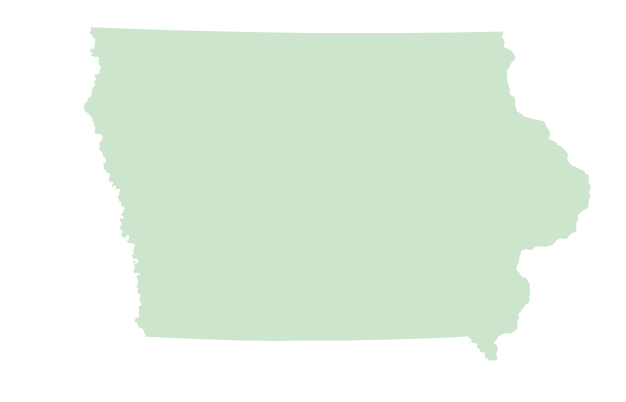

In [152]:
ia_shp["col"] = 'green'
plot = ia_shp.plot(figsize=(10,10), color=ia_shp["col"],alpha=.2)
plot.axis('off')

In [246]:
with open("ia_dists_pm500/66.txt",'r') as f:
    L = f.readlines()

for i in range(len(L)):
    L[i] = L[i][5:-2].replace(" ","").split(",")
    L[i] = tuple(list(map(int, L[i])))
    print(sum(L[i]))
L.sort()    
print(len(L))

27
27
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
31
31
31
32
39


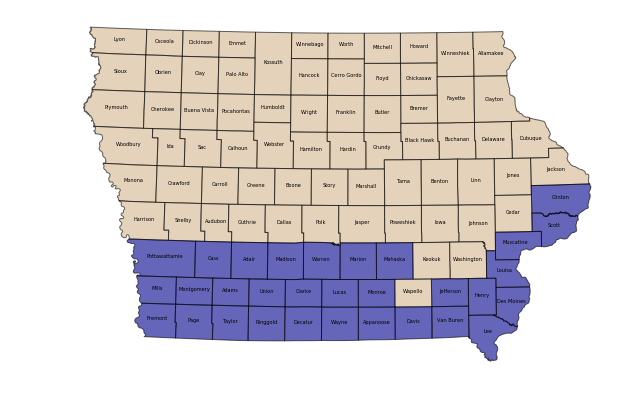

In [245]:
for k in range(len(L)):   
    dist = L[k]
    for i in range(len(dist)):
        if dist[i] == 1: ia_shp.at[ia_shp["COUNTY"]==counties[i],'col'] = 'DarkBlue'
        else: ia_shp.at[ia_shp["COUNTY"]==counties[i],'col'] = 'tan'
    plot = ia_shp.plot(figsize=(10,10), color=ia_shp["col"],alpha=.6, edgecolor="black")
    plot.axis('off')
    ia_shp.apply(lambda x: plot.annotate(s=x.COUNTY, xy=x.geometry.centroid.coords[0], ha='center', size=5),axis=1)
    clear_output(wait=True)

    plt.show()
    time.sleep(.1)

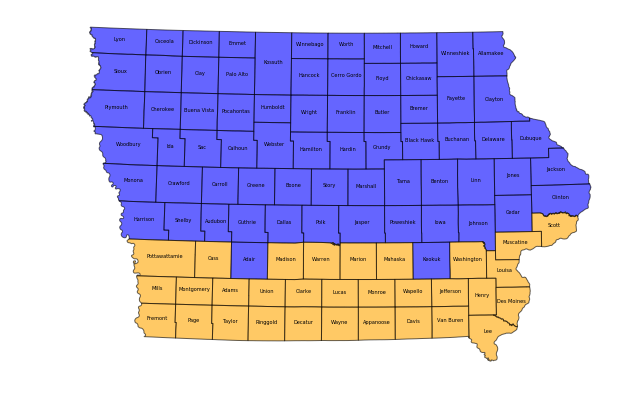

In [160]:
import pysal as ps
rW = ps.weights.Rook.from_dataframe(ia_shp)

In [215]:
print(ia_shp.index[ia_shp["COUNTY"]=="Shelby"].tolist()[0])
print("\n\n")
edges = np.sum(rW.full()[0],axis=1)
count = 0
for i in rW.full()[0][:,57]:
    if i == 1:
        print(count)
    count +=1

57



48
56
58
68
69


In [182]:
print(sum(edges)/2)

223.0


In [210]:
for i in range(100):
    print(i+1,counties[i],int(edges[ia_shp.index[ia_shp["COUNTY"]==counties[i]].tolist()[0]]))

1 Lyon 2
2 Osceola 3
3 Dickinson 3
4 Emmet 3
5 Kossuth 5
6 Shelby 5
7 Winnebago 3
8 Worth 3
9 Mitchell 4
10 Howard 3
11 Winneshiek 4
12 Allamakee 2
13 Sioux 3
14 Obrien 4
15 Clay 4
16 Palo Alto 4
17 Hancock 4
18 Cerro Gordo 5
19 Floyd 4
20 Chickasaw 5
21 Fayette 5
22 Clayton 4
23 Plymouth 3
24 Cherokee 5
25 Buena Vista 4
26 Pocahontas 5
27 Humboldt 4
28 Wright 5
29 Franklin 4
30 Butler 5
31 Bremer 4
32 Woodbury 4
33 Ida 4
34 Sac 5
35 Calhoun 5
36 Webster 7
37 Hamilton 5
38 Hardin 5
39 Grundy 5
40 Black Hawk 6
41 Buchanan 5
42 Delaware 5
43 Dubuque 4
44 Monona 3
45 Crawford 6
46 Carroll 6
47 Greene 6
48 Boone 6
49 Story 6
50 Marshall 5
51 Tama 5
52 Benton 5
53 Linn 6
54 Jones 6
55 Jackson 3
56 Harrison 4
57 Audubon 4
58 Guthrie 5
59 Dallas 6
60 Polk 6
61 Jasper 6
62 Poweshiek 5
63 Iowa 5
64 Johnson 6
65 Cedar 6
66 Clinton 4
67 Muscatine 4
68 Scott 3
69 Pottawattamie 5
70 Cass 6
71 Adair 5
72 Madison 5
73 Warren 6
74 Marion 6
75 Mahaska 6
76 Keokuk 6
77 Washington 6
78 Louisa 5
79 Mills 

IndexError: list index out of range

In [191]:
for i in edges[0:10]:
    print(int(i))

2
3
3
3
2
5
4
3
3
4
